Un cercetător măsoară nivelul de zgomot ambiental în diferite locaţii dintr-un oraş. El suspectează că nivelul de
zgomot, notat 𝑋 , urmează o distribuţie normală, dar atât media 𝜇, cât şi deviaţia standard 𝜎 sunt necunoscute.
Cercetătorul are 10 observaţii ale nivelului de zgomot (în decibeli, dB):
56, 60, 58, 55, 57, 59, 61, 56, 58, 60.
Scopul este să folosim inferenţa Bayesiană pentru a estima pe 𝜇 şi pe 𝜎.

a) Definiţi un model în PyMC pentru această problemă. Puteţi alege ca distribuţii a priori 𝜇 ∼ N (𝑥, 102) şi
𝜎 ∼HalfNormal(10). Cât ar trebui să fie 𝑥?

b) Inferaţi asupra lui 𝜇 şi 𝜎. Care este intervalul de încredere (HDI 95%) pentru 𝜇 şi 𝜎?

58.0


Output()

Output()

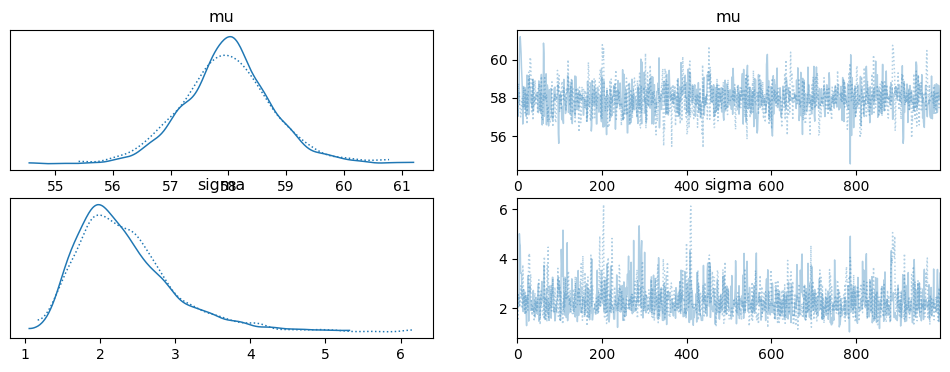

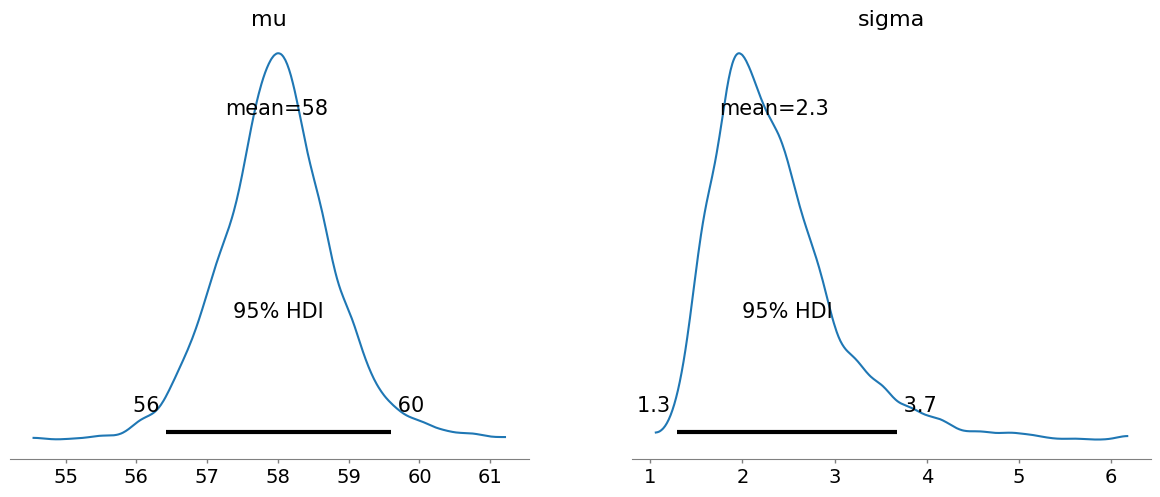

In [8]:
import pymc as pm
import numpy as np
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt

def lab7():
  observed_sound_levels = [56, 60, 58, 55, 57, 59, 61, 56, 58, 60]
  sound_mean = np.mean(observed_sound_levels)
  print(sound_mean)

  with pm.Model() as noise_model:
    mu = pm.Normal('mu', mu=sound_mean, sigma=100)
    sigma = pm.HalfNormal('sigma', sigma=10)
    X = pm.Normal('X', mu=mu, sigma=sigma, observed=observed_sound_levels)

    trace = pm.sample(1000, return_inferencedata=True)
    az.plot_trace(trace, var_names=['mu', 'sigma'])
    plt.show()

    az.plot_posterior(trace, var_names=['mu', 'sigma'], hdi_prob=0.95)
    plt.show()

lab7()